# **3.7 - Tudo que está bom, pode melhorar** 📈
**Objetivo**: Compare o tempo de execução de três algoritmos diferentes de otimização (busca aleatória, busca em grade e algoritmos genéticos) para resolver o problema das caixas binárias. Para este exercício, considere como critério de parada para o algoritmo genético e para a busca aleatória o ato de encontrar a resposta do problema. Mantenha o algoritmo de busca em grade com o critério de parada visto na disciplina (isto é, testar todas as possibilidades).
***

### **Introdução** 💡

<p style="text-align:justify;">
A otimização é uma abordagem matemática voltada para a busca da melhor solução possível dentro de um conjunto de alternativas, respeitando os objetivos e restrições impostos pelo problema. Atualmente, diversas estratégias de otimização estão disponíveis, sendo sua aplicação dependente da natureza e complexidade do cenário analisado. [1]
</p>

Dentre essas, podemos ressaltar:
* Busca em grade (Grid Search), que consiste no teste de todas as combinações possíveis dentro do espaço de busca;
* Busca aleatória (Random Search), a qual visa o teste aleatório de um certo número de combinações dentro do espaço de busca;
* Algoritmos Genéticos, inspirados na Teoria da Evolução de Darwin, utilizam mecanismos como seleção, cruzamento e mutação para evoluir uma população de soluções ao longo das gerações, buscando aproximações sucessivamente melhores.

<p style="text-align:justify;">
Nesse contexto, existem diversos problemas "brinquedo" - simplificados e bem-definidos - que podem ser utilizados para testar o funcionamento desses algoritmos. Um dos mais conhecido é o problema das <strong>caixas binárias</strong>, no qual existem n caixas que podem ser preenchidas com 0 ou 1. O objetivo central é encontrar a configuração que possui maior soma total e, por mais que o resultado pareça trivial (obviamente o melhor resultado é que todas as caixas sejam preenchidas com o maior valor, nesse caso, 1), esse se mostra especialmente útil para estudar e comparar a eficiência dos algoritmos de otimização em cenários simples, mas representativos.
</p>

<p style="text-align:justify;">
Nesse notebook, portanto, o tempo de execução dos três algoritmos será comparado, a partir da medição do tempo de execução pelo módulo <code> time </code>, para verificar qual desses é mais efetivo para a resolução do problema das caixas binárias. O teste incluirá um range de quantidade de caixas compreendido entre 2 e 20 caixas, sendo que para cada uma delas, cinco medições serão realizadas. O resultado considerado para cada caixa será a médias dos três tempos e os resultados serão plotados em um gráfico com três curvas. 

Vale ressaltar que as funções relacionadas a resolução do problema estão contidas no arquivo py "script.cb.py". Além disso, o notebook foi executado com auxílio do HPC, o que pode justificar os pequenos tempos observados. 
</p>

![Estratégias de Otimização.png](<attachment:Estratégias de Otimização.png>)
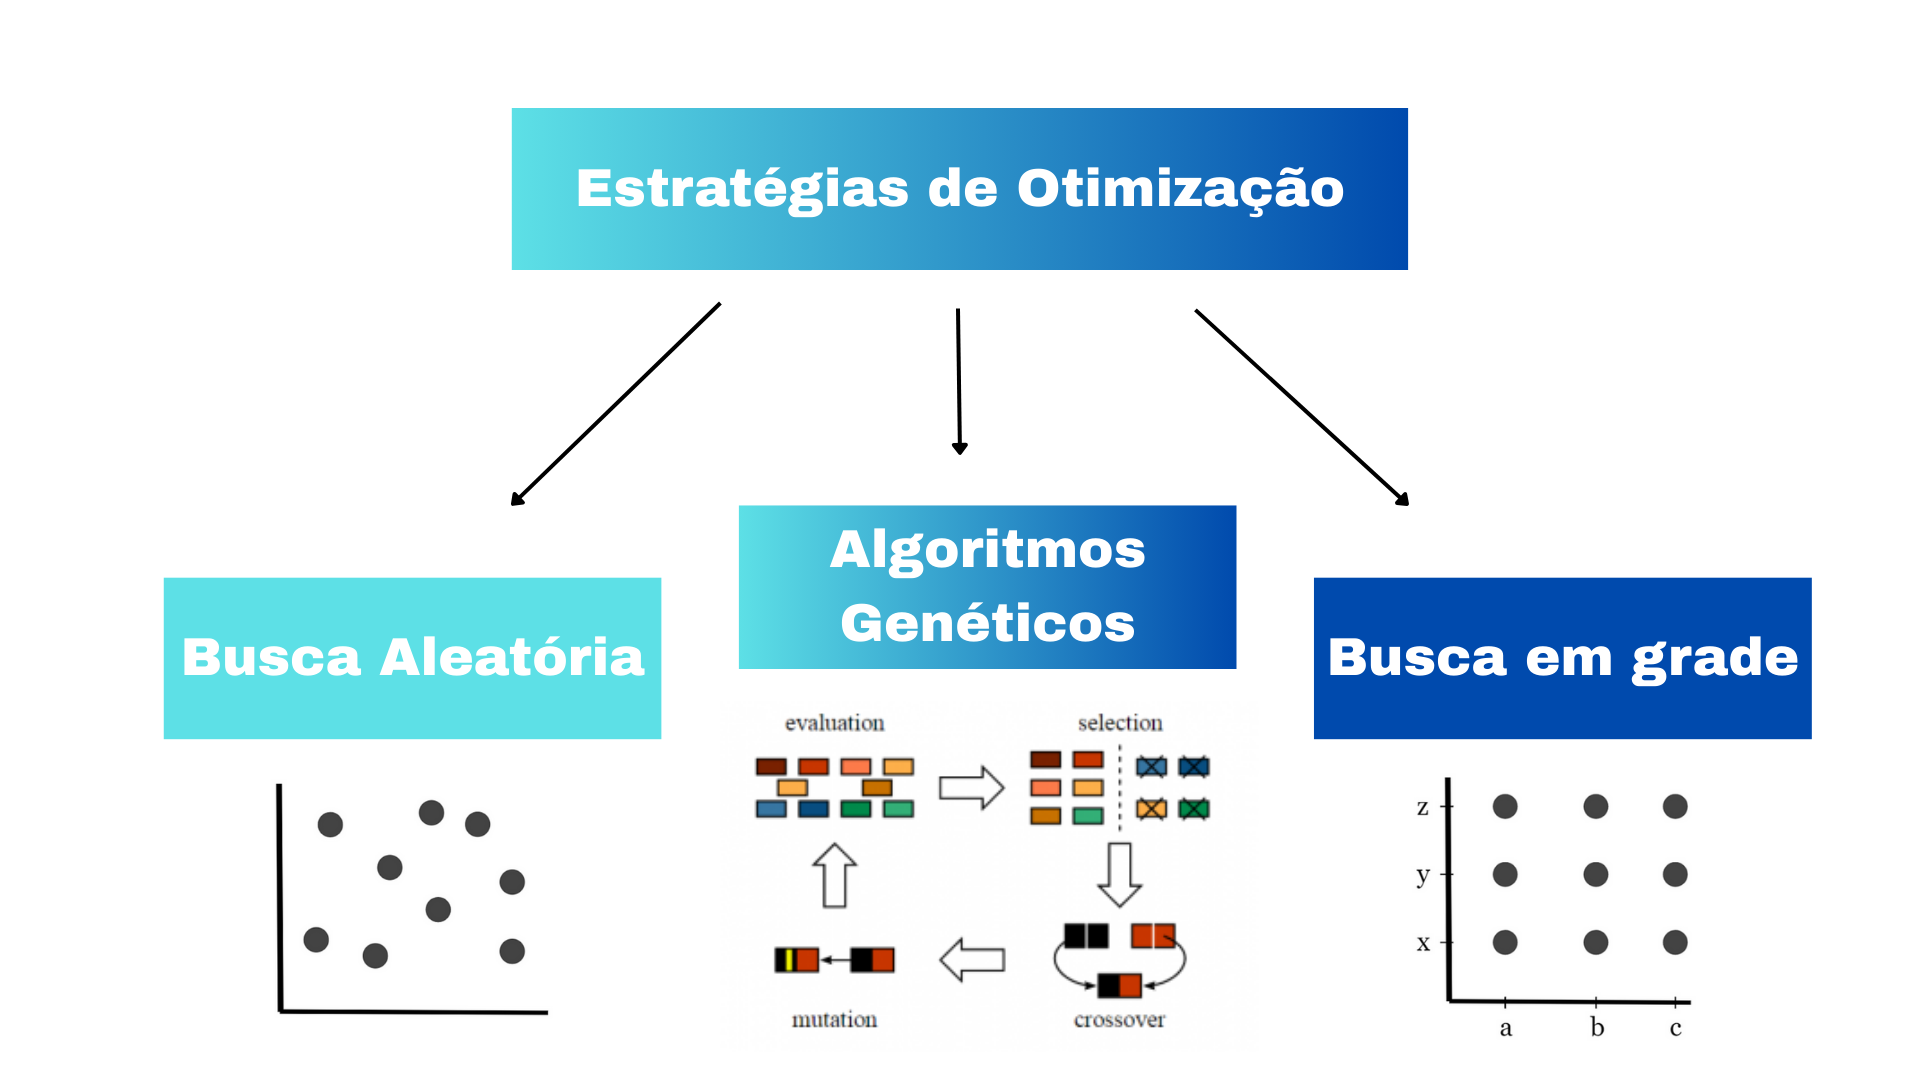

<p style = "text-align:center;">
Figura 1: Estratégias de otimização [Esquema autoral combinando imagens das referências 2 e 3]

### **Importação de bibliotecas** 📚

In [1]:
# Módulos gerais
import random
from itertools import product
import time
import matplotlib.pyplot as plt
import numpy as np

# Funções para busca aleatória e busca em grade
from script_cb import funcao_objetivo_cb, gene_cb_rs, cria_candidato_cb_rs

# Funções para o algoritmo genético
from script_cb import funcao_objetivo_pop_cb, populacao_cb, selecao_roleta_max, cruzamento_ponto_simples, mutacao_simples_cb

### **Busca aleatória** 🔍

Para marcar o tempo de execução da busca aleatória, é possível utilizar a função ``temporizador_busca_aleatoria``, a qual, ao receber o intervalo de quantidade de caixas, realiza a busca para cada valor contido por cinco vezes. A média desse valor é considerada uma estimativa da performance do algoritmo. Além disso, vale ressaltar que as funções "cria_candidato_cb_rs" e "funcao_objetivo" são responsáveis por, respectivamente, criar um gene - nesse caso, uma caixa -  e calcular a função objetivo para o problema das caixas binárias - que, nesse caso, consiste na soma dos valores de todas as caixas. Como saída, a função retorna duas listas: uma com as médias e outra com o desvio padrão de cada valor de caixa.

In [2]:
def temporizador_busca_aleatoria(quant_min_caixas, quant_max_caixas):
    """
    Função que simula a busca aleatória para o problema de caixas binárias para uma determinada quantidade de caixas.
    
    Args:
    quant_min_caixas: quantidade mínima de caixas a serem buscadas
    quant_max_caixas: quantidade máxima de caixas a serem buscadas
    
    """
    media_tempo = []
    desvio_padrao = []
   
    for quant_caixas in range(quant_min_caixas, quant_max_caixas +1):
        lista_estimativas_tempo = []
        for i in range(5):
            tempo_inicial = time.time()
            fobj = 0
            while fobj != quant_caixas:
                for num_caixas in range(quant_caixas):
                    candidato = cria_candidato_cb_rs(quant_caixas)
                    fobj = funcao_objetivo_cb(candidato)
            tempo_final = time.time()
            tempo_total = tempo_final - tempo_inicial
            lista_estimativas_tempo.append(tempo_total)

        estimativa_tempo = np.mean(lista_estimativas_tempo)
        desvio_padrao.append(np.std(lista_estimativas_tempo, ddof=1))
                             
        media_tempo.append(estimativa_tempo)
                             
        print(f"A média do tempo para {quant_caixas} foi igual a {estimativa_tempo} +- {np.std(lista_estimativas_tempo)} segundos")
    return media_tempo, desvio_padrao

In [3]:
medias_busca_aleatoria, std_busca_aleatoria = temporizador_busca_aleatoria(2, 20)

A média do tempo para 2 foi igual a 1.201629638671875e-05 +- 1.0123781800433634e-05 segundos
A média do tempo para 3 foi igual a 3.35693359375e-05 +- 2.6569030989632948e-05 segundos
A média do tempo para 4 foi igual a 3.7670135498046875e-05 +- 2.8893341564404953e-05 segundos
A média do tempo para 5 foi igual a 0.00016918182373046876 +- 4.7800303028140114e-05 segundos
A média do tempo para 6 foi igual a 0.0006853103637695313 +- 0.0006002610659543806 segundos
A média do tempo para 7 foi igual a 0.0009462356567382813 +- 0.0009724247082644542 segundos
A média do tempo para 8 foi igual a 0.0038116455078125 +- 0.004113561968203643 segundos
A média do tempo para 9 foi igual a 0.011147022247314453 +- 0.005708154601199423 segundos
A média do tempo para 10 foi igual a 0.01812577247619629 +- 0.014701339518831853 segundos
A média do tempo para 11 foi igual a 0.10888233184814453 +- 0.07281729627789557 segundos
A média do tempo para 12 foi igual a 0.13587865829467774 +- 0.17218512557843502 segundos


### **Busca em grade** 🌐

Utilizando o mesmo princípio da função anterior, a função ``temporizador_busca_em_grade`` realiza a busca em grade para uma quantidade de caixas definida em um intervalo por 5 vezes e fornece como métrica a média e o desvio padrão dessas medições. Para a realização da busca em grade, a função ``product`` do módulo itertools é utilizado e, como função objetivo, a função ``funcao_objetivo_cb`` é novamente utilizada.

In [4]:
def temporizador_busca_em_grade(quant_min_caixas, quant_max_caixas):
    """
    Função que simula a busca em grade para o problema de caixas binárias para uma determinada quantidade de caixas.
    
    Args:
    quant_min_caixas: quantidade mínima de caixas a serem buscadas
    quant_max_caixas: quantidade máxima de caixas a serem buscadas
    
    """
    media_tempo = []
    desvio_padrao = []
   
    for quant_caixas in range(quant_min_caixas, quant_max_caixas +1):
        lista_estimativas_tempo = []
        for i in range(5):
            tempo_inicial = time.time()

            for candidato in product([0, 1], repeat=quant_caixas):
                fobj = funcao_objetivo_cb(candidato)
            tempo_final = time.time()
            tempo_total = tempo_final - tempo_inicial
            lista_estimativas_tempo.append(tempo_total)

        estimativa_tempo = np.mean(lista_estimativas_tempo)
        desvio_padrao.append(np.std(lista_estimativas_tempo, ddof=1))
                             
        media_tempo.append(estimativa_tempo)
                             
        print(f"A média do tempo para {quant_caixas} foi igual a {estimativa_tempo} +- {np.std(lista_estimativas_tempo)} segundos")
    return media_tempo, desvio_padrao
    

In [5]:
medias_busca_em_grade, std_busca_em_grade = temporizador_busca_em_grade(2, 20)

A média do tempo para 2 foi igual a 1.9073486328125e-06 +- 2.0342568404866737e-06 segundos
A média do tempo para 3 foi igual a 1.33514404296875e-06 +- 8.996945507103542e-07 segundos
A média do tempo para 4 foi igual a 1.6689300537109375e-06 +- 5.43678009557313e-07 segundos
A média do tempo para 5 foi igual a 3.0994415283203125e-06 +- 5.642013342952362e-07 segundos
A média do tempo para 6 foi igual a 5.91278076171875e-06 +- 6.289914111267528e-07 segundos
A média do tempo para 7 foi igual a 1.201629638671875e-05 +- 8.869683855885636e-07 segundos
A média do tempo para 8 foi igual a 2.5320053100585938e-05 +- 1.228723404572022e-06 segundos
A média do tempo para 9 foi igual a 5.2928924560546875e-05 +- 2.148414674009096e-06 segundos
A média do tempo para 10 foi igual a 0.00011224746704101563 +- 2.5696170015921553e-06 segundos
A média do tempo para 11 foi igual a 0.00023293495178222656 +- 4.304759522740314e-06 segundos
A média do tempo para 12 foi igual a 0.0004998683929443359 +- 9.75781739574

### **Algoritmos Genéticos** 🧬

Utilizando também os princípios das funções anteriores, a função ``temporizador_algoritmo_genetico`` apresenta alguns argumentos adicionais para a implementação do algoritmo genético (chance_cruzamento, chance_mutacao_tamanho_populacao). Para a construção do algoritmo genético, funções presentes no arquivo "script_cb.py" são utilizadas, sendo essas: "populacao_cb", para a criação da população inicial com o número de indivíduos definido pelo argumento "tamanho_população"; "funcao_objetivo_pop_cb", que computa a função fitness - soma do valor de todas as caixas - para cada indivíduo de uma popução; "selecao_roleta_max", realiza a operação de seleção dos indivíduos aptos pelo método da roleta; "cruzamento_ponto_simples", que realiza a operação de cruzamento pelo método de ponto simples (com base na variável de chance_cruzamento); "mutacao_simples_cb", que é responsável pela operação de mutação, baseada no argumento chance_mutacao. 

Para esse teste, as variáveis para a composição do algoritmo genético, serão: 0.5 para a chance de cruzamento, 0.05 para a chance de mutação e 10 para o tamanho da população.

In [6]:
chance_cruzamento = 0.5
chance_mutacao = 0.05
tamanho_populacao = 10

In [9]:
def temporizador_algoritmo_genetico(quant_min_caixas, quant_max_caixas, chance_cruzamento, chance_mutacao, tamanho_populacao):
    """
    Função que simula a busca em grade para o problema de caixas binárias para uma determinada quantidade de caixas.
    
    Args:
    quant_min_caixas: quantidade mínima de caixas a serem buscadas
    quant_max_caixas: quantidade máxima de caixas a serem buscadas
    chance_cruzamento: chance da operação cruzamento ocorrer
    chance_mutacao: chance da operação de mutação ocorrer
    tamanho_populacao: quantidade de indivíduos por geração
    """
    media_tempo = []
    desvio_padrao = []
   
    for quant_caixas in range(quant_min_caixas, quant_max_caixas +1):
        
        for i in range(5):
            lista_estimativas_tempo = []
            tempo_inicial = time.time()
            populacao = populacao_cb(tamanho_populacao, quant_caixas)

            hall_da_fama = []

            maior_fitness = 0
            while maior_fitness != quant_caixas:
                
                fitness = funcao_objetivo_pop_cb(populacao)        
                selecionados = selecao_roleta_max(populacao, fitness)
                
                proxima_geracao = []
                for pai, mae in zip(selecionados[::2], selecionados[1::2]):
                    individuo1, individuo2 = cruzamento_ponto_simples(pai, mae, chance_cruzamento) 
                    proxima_geracao.append(individuo1)
                    proxima_geracao.append(individuo2)
                
                mutacao_simples_cb(proxima_geracao, chance_mutacao)
                
                fitness = funcao_objetivo_pop_cb(proxima_geracao)
                    
                maior_fitness = max(fitness)
                indice = fitness.index(maior_fitness)
                hall_da_fama.append(proxima_geracao[indice])    
                
                populacao = proxima_geracao

                fitness = funcao_objetivo_pop_cb(hall_da_fama)
                maior_fitness = max(fitness)
            
            tempo_final = time.time()
            tempo_total = tempo_final - tempo_inicial
            lista_estimativas_tempo.append(tempo_total)
                
        estimativa_tempo = np.mean(lista_estimativas_tempo)
        desvio_padrao.append(np.std(lista_estimativas_tempo, ddof=1))
                             
        media_tempo.append(estimativa_tempo)
                             
        print(f"A média do tempo para {quant_caixas} foi igual a {estimativa_tempo} +- {np.std(lista_estimativas_tempo)} segundos")
    return media_tempo, desvio_padrao

In [10]:
medias_algoritmo_genetico, std_algoritmo_genetico = temporizador_algoritmo_genetico(2, 20, chance_cruzamento, chance_mutacao, tamanho_populacao)

/home/julia24002/anaconda3/envs/ilumpy/lib/python3.9/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/julia24002/anaconda3/envs/ilumpy/lib/python3.9/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


A média do tempo para 2 foi igual a 5.2928924560546875e-05 +- 0.0 segundos
A média do tempo para 3 foi igual a 3.218650817871094e-05 +- 0.0 segundos
A média do tempo para 4 foi igual a 3.814697265625e-05 +- 0.0 segundos
A média do tempo para 5 foi igual a 4.029273986816406e-05 +- 0.0 segundos
A média do tempo para 6 foi igual a 0.00013303756713867188 +- 0.0 segundos
A média do tempo para 7 foi igual a 5.1975250244140625e-05 +- 0.0 segundos
A média do tempo para 8 foi igual a 0.00014638900756835938 +- 0.0 segundos
A média do tempo para 9 foi igual a 0.00044155120849609375 +- 0.0 segundos
A média do tempo para 10 foi igual a 0.0005843639373779297 +- 0.0 segundos
A média do tempo para 11 foi igual a 0.0005376338958740234 +- 0.0 segundos
A média do tempo para 12 foi igual a 0.0010318756103515625 +- 0.0 segundos
A média do tempo para 13 foi igual a 0.00465083122253418 +- 0.0 segundos
A média do tempo para 14 foi igual a 0.03480100631713867 +- 0.0 segundos
A média do tempo para 15 foi igual 

### **Análise dos resultados** 📊

Para a análise dos resultados, um gráfico scatter relativo a cada algoritmo será plotado. A quantidade de caixas e o respectivo tempo serão definidos como, respectivamente, os eixos x e y. Enquanto isso, o desvio padrão será definido como o erro de cada medição.

In [11]:
X_grafico = list(range(2,21))
X_grafico

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

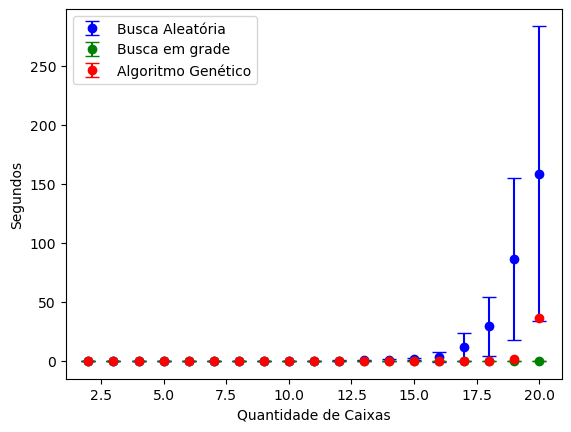

In [12]:
plt.errorbar(X_grafico, medias_busca_aleatoria, yerr=std_busca_aleatoria, fmt='o', capsize=5, label='Busca Aleatória', color='blue')
plt.errorbar(X_grafico, medias_busca_em_grade, yerr=std_busca_em_grade, fmt='o', capsize=5, label='Busca em grade', color='green')
plt.errorbar(X_grafico, medias_algoritmo_genetico, yerr=std_algoritmo_genetico, fmt='o', capsize=5, label='Algoritmo Genético', color='red')

plt.legend()
plt.ylabel("Segundos")
plt.xlabel("Quantidade de Caixas")
plt.show()

Em relação a cada algoritmo, temos que:

<p style="text-align:justify;">
* A busca aleatória foi o algoritmo que apresentou o pior desempenho, ou seja, os maiores tempos. Isso é justificado: esse tipo de algoritmo geralmente é utilizado para encontrar soluções próximas a solução ótima. Como nesse caso o critério de parada era apenas o encontro da melhor solução, o algoritmo não apresentou desempenho satistfatório. Ademais, em relação ao desvio padrão, temos que esse é o maior dentre os tipos, o que também se relaciona com a natureza da busca aleatória: Por ser um algoritmo não determinístico, o tempo utilizado para a encontrar a solução ótima pode variar bastante entre as 5 tentativas;
</p>

<p style="text-align:justify;">
* O algoritmo genético, com a configuração definida, apresentou bom desempenho, com aumento notável do tempo de execução apenas para a última quantidade de caixas; Apesar de depender da aleatoriedade, o algoritmo apresentou pouca variação no tempo de execução. Considerando que o algoritmo é não determinístico, uma mudança nos hiperparâmetros poderia alterar (diminuindo ou alterando) o tempo de convergência. 
</p>

<p style="text-align:justify;">
* A busca em grade, por outro lado, apresentou o melhor desempenho, com tempos semelhantes para todas as quantidades de caixas. Nesse sentido, apesar de contraintuitivo - visto que ele avalia todas as combinações possíveis - esse algoritmo apresenta-se como a melhor alternativa para as quantidades de caixas utilizadas. Isso provavelmente se deve ao pequeno espaço de busca considerado (apesar de 2^20 ser um grande número, em termos computacionais, esse cálculo pode ser menos custoso do que o uso de algoritmos que dependem de aleatoriedade para encontrar a solução ótima). Assim como o algoritmo genético, apresentou pequena variação dentre os testes realizados, o que também é justificado: por ser um algoritmo determinístico, grandes variações nos tempos de execução não são esperadas. 
</p>

Ou seja, para os tamanhos testados, a busca em grade mostrou-se a alternativa mais eficiente para a resolução do problema das caixas binárias.

### **Conclusão** 🕰️

A partir da análise dos tempos de execução, foi possível concluir que a busca em grade apresentou-se como melhor forma de resolução para o problema das caixas binárias, considerando o número de caixas analisado. Isso pode ser justificado pelo tamanho do espaço de busca: apesar de, no caso de 20 caixas (maior quantidade analisada), esse ser grande ($2^{20}$), o custo computacional para percorrer todas essas possibilidades pode ser menor do que depender da aleatoriedade em algoritmos não determinísticos (como algoritmos genéticos e busca aleatória) para encontrar a solução ótima. Ou seja, é possível concluir que a escolha do algoritmo depende diretamente do problema e, consequentemente, do espaço de busca definido. 

### **Referências** 🗃️

[1] What Is Optimization Modeling? | IBM. Disponível em: <https://www.ibm.com/think/topics/optimization-model>. Acesso em: 4 maio 2025.

[2] STALFORT, Jack. Hyperparameter tuning using Grid search and Random search. Disponível em: <https://medium.com/@jackstalfort/hyperparameter-tuning-using-grid-search-and-random-search-f8750a464b35>. Acesso em: 6 maio 2025.

[3] STROSKI, Pedro Ney. O que é algoritmo genético? Electrical e-Library.com. Disponível em: <https://www.electricalelibrary.com/2018/04/13/o-que-e-algoritmo-genetico/>. Acesso em: 6 maio 2025.

